# COGS 118B - Final Project (Group RILS)

# Movie Recommendation System

## Group members

- Rebecca Du
- Lauren Himpelmann
- Stephanie Lew
- Ian Zane

# Abstract

To aid with the struggle of selecting a movie to watch in the oversaturated film industry of today, we have created a **movie recommendation system**. Our system is rooted in clustering algorithms implemented on PCA-reduced data. After trying both K-Means and agglomerative clustering, agglomerative clustering emerged as the winner with drastically improved silhouette scores and pseudo rand index accuracy rates. Finally, we used logistic regression for the actual recommending system by using euclidean distance between the inputed movie and TMDB count count/average/ popularity to predict the id of the recommended movie. We tested our results by inputting movie id ​​615656 (Meg 2: The Trench) and it returned 1006462 (The Flood) and 205321 (Sharknado). All these movies are fairly similar, based on the same idea of a crazed marine animal attacking. 

# Background

In today’s rapidly expanding entertainment industry, the sheer volume of movies, books, and other forms of media can easily overwhelm consumers. Especially the exponential growth of data caused particularly during the wake of the COVID-19 pandemic, we saw more and more people working and learning from home and used home entertainment options more often<a name="taylor"></a>[<sup>[1]</sup>](#taylornote).  Spending hours just trying to find the perfect movie can be frustrating especially while navigating sheer amounts of content. Movie recommender systems however subtly changed the ways we make our choices. They offer a solution to this plethora of data by using machine learning techniques to analyze user behavior and preferences. By understanding the pattern of user interaction with movies, these systems can tailor recommendations to individual tastes, making the process of discovering new content more efficient and enjoyable. 

A study done by Jayalakshmi, Ganesh, Čep, and Murugan seeks to create an effective movie recommendation system by describing the challenges of the system and increasing its accuracy. In order to effectively suggest movies to users, there are three types of methods they discussed. One is collaborative filtering which analyzes user information/history. They look at what the user and users with the same demographic (age, sex, etc.) have watched in order to figure out a pattern in preferences. Content-based filtering looks at only the content of the movies and eliminates the problem where some users of the same demographic might not necessarily have the same taste in movies. Some examples they gave of content-based filtering is looking at the genre or the key characters of the movie. Lastly, context-based filtering takes into account how preferences stay the same across different platforms where “if both people are attracted to Christmas movies from Netflix, it is most likely that they will still like Christmas movies by Showmax””<a name="jayalakshmi"></a>[<sup>[2]</sup>](#jayalakshminote). This research contributes to the development of more accurate and effective recommendation algorithms. Understanding the nuances of these recommendation algorithms is imperative for improving user experience and mitigating effects of information overload.

# Problem Statement

With the overabundance of movies to choose from, we wanted to create a streamlined system through which users could receive recommendations for movies based on existing titles they enjoy. To do this, we used unsupervised machine learning to train a model that will accurately recommend movies based on similarity (and other metrics such as popularity and user rating) to provide individuals with a more tailored recommendation experience. The initial framework of the model is created through PCA for dimensionality reduction and K-Means clustering to group the data. The recommendation part of our project comes from regression, which takes into account factors such as movie genre, popularity, and user rating of certain titles. This way, users will receive recommendations that are close in taste to their liked movies, as well as others that are popular but might be a bit different from their likes to diversify their experience. The success of the recommendation system can be measured through metrics such as the silhouette score for cluster quality. The problem of movie recommendation is easily replicable due to the constant release of new films. Additionally, the usefulness of our recommendation system is not limited to films alone, as it will be able to successfully recommend other things with similar information (such as TV shows and cartoons), thus ensuring the relevance of our project. 

# Data
- **[Movies Daily Update Dataset](https://www.kaggle.com/datasets/akshaypawar7/millions-of-movies)**
    - **Specs**: 20 variables; 575,340 unique values (observations)
    - **Summary**: This dataset contains metadata for many movies including information on cast, crew, plot keywords, budget, revenue, release dates, languages, etc. It was taken from the TMDB Dataset, specifically the TMDB open API.
    - **Observation**: An observation is defined as one movie, with information about the movie’s cast, crew, plot keywords, budget, revenue, release date, languages, etc.
    - **Critical Values**:
      - **Genre**: Dash-separated string (will need to be manually separated into a list before training)
      - **Language**: Abbreviated (e.g. English -> en)
      - **Release Date**: String in year-month-day format
      - **Runtime**: Decimal, rounded up to nearest whole number
      - **Credit**: Dash-separated string (will need to be manually separated into a list before training)
      - **Keywords**: Dash-separated string (will need to be manually separated into a list before training)
      - **Recommendations**: Dash-separated string (will need to be manually separated into a list before training)
    - **Use**: This will be the main dataset that we will perform unsupervised machine learning on. The “recommendations” column will be omitted from training and be used as a measure of project success.

# Proposed Solution

To create recommendations, we aim to use a **clustering algorithm to identify groups of movies based on characteristics** like genre, plot keywords, cast, language, release date, etc, and then use metrics such as the reviews and the Euclidean distance in the feature space to determine if a given movie within a cluster should be recommended to the individual. We think this solution is likely to provide good results, as both steps should help narrow down the hundreds of thousands of possible movies from this dataset into a small selection of good-quality recommendations based on specific movies. The first step aims to subsection the data into smaller groups of similar movies based on the general criteria used to decide the type of movie. For example, this step would help people narrow their focus down to only a selection of action/superhero movies if they really enjoy the Marvel franchise. Then, dimensionality reduction will be applied through PCA to reduce the complexity of the data and make it easier to process. Then from there, the third  step aims to collect a subset of the movies in this larger class based on their quality. While there may be a movie that in terms of genre and cast is relatively similar to one you enjoy, if the movie itself isn’t good you probably won’t appreciate the recommendation.

To achieve this, we will likely use a model from the sklearn clustering methods to form the basis of the first section, and then follow it with a supervised model to generate the output of specific movie recommendations. We will likely need to take some steps to organize the data in a more usable form, such as using one-hot encoding for the many categorical variables, using standardization to account for the drastic differences in magnitude between things like revenue and scores, or potentially using dimensionality reduction to manage the significant number of dimensions that will be created after one-hot encoding

While many other services do movie recommendations, due to the nature of differences (such as the different datasets or them using large collections of user preferences), there isn’t a clear example to test against. However, we do still have metrics for evaluating them. This data is scraped from TMDB which has its own suggestions of movies to watch, which will be used as a comparison for the quality of the mode.

# Evaluation Metrics

In our proposed dataset (Movies Daily Update Dataset), the original site the data is scraped from contains a list of recommended movies. We aim to treat this as a form of benchmark model that can be used as a comparison for our proposed solution, and also as a means of calculating an adjusted rand index. The recommendations from TMDB form a kind of cluster, where we can check if two items belong to the same cluster based on whether they show up in the recommendation of each other. Unfortunately, as we don’t know how TMDB creates their recommendations, we will be unable to truly test it as a benchmark model, as we can’t evaluate any internal performance of it. Additionally, we will use the Silhouette coefficient to have a better means of evaluating our overall clusters, given that we have no real ground truths for them.

The **rand index** is a metric for comparing two distinct clustering methods by comparing pairs of data points and their respective clusters in each. For example, if two data points are in the same cluster in algorithm A, and they are in the same cluster in algorithm B, then the rand index would be higher, while if they are in the same cluster in algorithm A but different clusters in algorithm B, then the rand index would be lower. The adjusted rand index is just a version of the rand index which considers the likelihood of agreement due to random chance. The formula for the rand index is given by R = $\frac{a + b}{a + b + c + d}$ where $a$ is the number of points in the same cluster in both, $b$ is the number of points in different clusters in both, and $c$ and $d$ are the number of points which have disagreements between the two clusterings. For the recommender system, we will implement a **pseudo rand index** that uses the top 5 TMDB recommendations for each movie and assesses whether they belong to the same cluster as the movie you are searching. If our model performs well, a high percentage of the recommended movies will be in the same cluster. 

The **silhouette coefficient** on the other hand is an internal evaluation of a single model. This is calculated by comparing the mean distance between a point and all other points of the same cluster, to the smallest mean distance between that point and all points of a different cluster. This means if a cluster is well formed, and all points are relatively similar to each other the silhouette coefficient for each point will be closer to $1$, while if a point is poorly classified and would likely fit better into a different cluster, the value will be closer to -1. The silhouette score can be calculated for a single point by using the formula $\frac{b(i) - a(i)}{max(a(i),b(i)}$ where $a(i)$ is the mean distance between a point and all other points of the same cluster and $b(i)$ is the minimum of all possible mean distances between that point and all points of another cluster.

# Results

The core of our recommender system is the **Agglomerative Clustering** algorithm we employed to cluster the movies in our dataset. However, through trial and error, we realized that to achieve a meaningful clustering result, we needed to dimensionally reduce the data first. The following subsections lists the process through which we reached our end result. 

### 1) Data Cleaning

We began the process by cleaning the data we had. Since the dataset was of a considerable size and had many features that would not be relevant in the final algorithm, we performed the basic preprocessing steps listed below:

1) **Dropping irrelevant columns/features**: The dataset contained information that wouldn't be needed in the final algorithm, such as "overview" (summary of the movie's plot), "keywords" (similar to genre), and other features that are useful to the database the data was scraped from but not for our project. These columns were thus dropped. 

2) **Dropping duplicates and NaNs**: To ensure that we have a meaningful dataset without duplicate or NaN values, we cleared those out. 

3) **One-Hot Encoding for Production Companies, Credits, Language, Genres**: These features are crucial for our recommender because these are the metrics by which the recommender decides what movies to suggest. However, in the original database they were listed as a hyphenated string and contained upwards of 20 unique names for each movie. 
    - Thus, to simplify things, we split the features into individual columns and selected the top 13 unique companies and top 10 unique full name credits (with > 400 appearances in the entire database) to one-hot encode. 
    - Due to the importance of genre in categorizing films, we kept all the genres listed (19) and one-hot encoded them as well. 

3) **TMDB Recommendations**: As previously mentioned, the dataset contained movies that were recommended in The Movie Database. We intended to use these recommendations to assess the performance of our clustering algorithm. However, like the other features, this was also a hyphenated string. Thus, we split it into separate columns and kept the first 5 recommendations for each movie. 
    
5) **Creating New Dataframes for Clustering and Regression**: We completed the data cleaning process by creating copies of the resultant database. 
    - df_clustering retained only the one-hot encoded feature columns, as well as other relevant features such as language and release year. The values for genre were artificially inflated from one-hot encoded '1' to '3' due to the importance of genre in categorizing movies. 
    - df_regression contained more features (such as vote_count, popularity, etc.) that would be used in the recommendation function at the end. 
    
At this step in the process, the important dataframe is df_clustering, which is shown below. 

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

#Load data
df = pd.read_csv('movies.csv')
df.head()
df.shape[0]

#Drop irrelevant columns, duplicates, NaNs
columns_to_remove = ['overview', 'keywords', 'poster_path', 'backdrop_path']
df = df.drop(columns = columns_to_remove)
df.head()
df_no_duplicates = df.drop_duplicates()
df_no_duplicates.shape[0]
df_cleaned = df_no_duplicates.dropna(subset=['recommendations'])
df_cleaned.head()
df_cleaned.shape[0]

#One-Hot Encoding
df_copy = df.copy()

# Handling missing values by replacing NaNs with an empty string
df_copy['production_companies'] = df_copy['production_companies'].fillna('')
df_copy['credits'] = df_copy['credits'].fillna('')

# Splitting the production companies by '-' and flattening the list
all_companies = [company for sublist in df_copy['production_companies'].apply(lambda x: str(x).split('-')) for company in sublist]

# Filter companies occurring at least 1750 times and are not empty
company_counts = Counter(all_companies)
unique_companies = [company for company, count in company_counts.items() if count >= 1750 and company != '']

# Company One Hot Encoding
company_data = {}
for company in unique_companies:
    company_data[company] = df_copy['production_companies'].apply(lambda x: 1 if company in x else 0)

# Splitting the credits by '-' and flattening the list
all_credits = [credit for sublist in df_copy['credits'].apply(lambda x: str(x).split('-')) for credit in sublist]

# Filter credits occurring at least 400 and are full names (at least 2 names)
credit_counts = Counter(all_credits)
unique_credits = [credit for credit, count in credit_counts.items() if count >= 400 and len(credit.split()) >= 2]

# Credits One Hot Encoding
credit_data = {}
for credit in unique_credits:
    credit_data[credit] = df_copy['credits'].apply(lambda x: 1 if credit in x else 0)

credit_df = pd.DataFrame(credit_data)
df_copy = pd.concat([df_copy, credit_df], axis=1)
company_df = pd.DataFrame(company_data)
df_copy = pd.concat([df_copy, company_df], axis=1)

# Split the 'recommendations' column by '-' and expand the result into separate columns
recommendations_split = df_copy['recommendations'].str.split('-', expand=True)

# Truncate recommendations_split to include only the first five split columns
recommendations_split = recommendations_split.iloc[:, :5]

# Assign new column names to the truncated columns
recommendations_split.columns = ['recommendation_1', 'recommendation_2', 'recommendation_3', 'recommendation_4', 'recommendation_5']

# One Hot Encoding for genres
genres_split = df_copy['genres'].str.get_dummies(sep='-')

# Adding everything together and removing all the old columns
df_copy = pd.concat([df_copy, genres_split, recommendations_split], axis=1)
df_copy = df_copy.drop(columns=['genres', 'recommendations', 'production_companies', 'credits'])

df_copy['is_english'] = 0
df_copy.loc[df_copy['original_language'] == 'en', 'is_english'] = 1

df_copy.drop('original_language', axis=1, inplace=True)

df_copy['release_date'] = pd.to_datetime(df_copy['release_date'])
df_copy['release_year'] = df_copy['release_date'].dt.year

df_copy.drop('release_date', axis=1, inplace=True)

# Removing columns for clustering 
df_clustering = df_copy.drop(columns=['popularity', 'budget', 'status', 'tagline', 'vote_average', 'vote_count'])

#Artificially inflate 'genre' by setting all one-hot encoded values to 2
df_clustering['Action'] = df_clustering['Action'].replace(1,2)
df_clustering['Adventure'] = df_clustering['Adventure'].replace(1,2)
df_clustering['Animation'] = df_clustering['Animation'].replace(1,2)
df_clustering['Comedy'] = df_clustering['Comedy'].replace(1,2)
df_clustering['Crime'] = df_clustering['Crime'].replace(1,2)
df_clustering['Documentary'] = df_clustering['Documentary'].replace(1,2)
df_clustering['Drama'] = df_clustering['Drama'].replace(1,2)
df_clustering['Family'] = df_clustering['Family'].replace(1,2)
df_clustering['Fantasy'] = df_clustering['Fantasy'].replace(1,2)
df_clustering['History'] = df_clustering['History'].replace(1,2)
df_clustering['Horror'] = df_clustering['Horror'].replace(1,2)
df_clustering['Music'] = df_clustering['Music'].replace(1,2)
df_clustering['Mystery'] = df_clustering['Mystery'].replace(1,2)
df_clustering['Romance'] = df_clustering['Romance'].replace(1,2)
df_clustering['Science Fiction'] = df_clustering['Science Fiction'].replace(1,2)
df_clustering['Thriller'] = df_clustering['Thriller'].replace(1,2)
df_clustering['TV Movie'] = df_clustering['TV Movie'].replace(1,2)
df_clustering['War'] = df_clustering['War'].replace(1,2)
df_clustering['Western'] = df_clustering['Western'].replace(1,2)

df_clustering.head()

,id,title,revenue,runtime,Frank Welker,Eric Roberts,Mark Calaway,Mel Blanc,Paul Michael Lévesque,Bess Flowers,...,Thriller,War,Western,recommendation_1,recommendation_2,recommendation_3,recommendation_4,recommendation_5,is_english,release_year
0,615656,Meg 2: The Trench,352056482.0,116.0,0,0,0,0,0,0,...,0,0,0,1006462,298618,569094,1061181,346698,1,2023.0
1,758323,The Pope's Exorcist,65675816.0,103.0,0,0,0,0,0,0,...,2,0,0,713704,296271,502356,1076605,1084225,1,2023.0
2,667538,Transformers: Rise of the Beasts,407045464.0,127.0,0,0,0,0,0,0,...,0,0,0,496450,569094,298618,385687,877100,1,2023.0
3,640146,Ant-Man and the Wasp: Quantumania,475766228.0,125.0,0,0,0,0,0,0,...,0,0,0,823999,676841,868759,734048,267805,1,2023.0
4,677179,Creed III,269000000.0,116.0,0,0,0,0,0,0,...,0,0,0,965839,267805,943822,842942,1035806,1,2023.0


### 2) Dimesionality Reduction

In our initial approach to the project, we did not use any dimensionality reduction algorithms and simply went straight into using sklearn's K-Means Clustering implementation. However, the results we got were confusing.

Thus, we decided to implement **PCA** to dimensionally reduce the data in df_clustering. Specifically, the steps we took were: 

1) **Genre Value Inflation**: As mentioned before, we artificially inflated the one-hot encoded genre values from 1 to 2 due to our view that genre is arguably the most important factor when looking for movies to recommend. 

2) **Scaling Features**: We needed to scale the numerical features (revenue, release_year, etc.) to make everything balanced. We scaled everything except the genres. 

3) **Performed PCA**: We then combined the genres with the scaled features and performed PCA

4) **Components Explaining 80% Variance**: To assess how much data was preserved after the dimensionality reduction, we looked for the number of components explaining 80% variance and got **24**. 

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
df_clustering.dropna(inplace=True)

features = df_clustering[['revenue', 'release_year', 'is_english',
       'runtime', 'Frank Welker', 'Eric Roberts', 'Mark Calaway', 'Mel Blanc',
       'Paul Michael Lévesque', 'Bess Flowers', 'Allen Jones', 'Nedumudi Venu',
       'KPAC Lalitha', 'Jagathy Sreekumar', 'Warner Bros. Pictures',
       'Paramount', 'Metro', 'Goldwyn', 'Mayer', 'Universal Pictures',
       'Columbia Pictures', 'Toei Company', 'ARTE', 'ZDF', 'Film', 'ONF | NFB',
       'BBC', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western']]

features_to_scale = ['revenue', 'release_year', 'is_english', 'runtime', 'Frank Welker', 'Eric Roberts', 
                     'Mark Calaway', 'Mel Blanc', 'Paul Michael Lévesque', 'Bess Flowers', 
                     'Allen Jones', 'Nedumudi Venu', 'KPAC Lalitha', 'Jagathy Sreekumar', 
                     'Warner Bros. Pictures', 'Paramount', 'Metro', 'Goldwyn', 'Mayer', 
                     'Universal Pictures', 'Columbia Pictures', 'Toei Company', 'ARTE', 
                     'ZDF', 'Film', 'ONF | NFB', 'BBC']

# Select features for PCA
features_for_pca = [col for col in features.columns if col not in features_to_scale]

# Scale the features that need to be scaled
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering[features_to_scale])

# Perform PCA
pca = PCA()
pca.fit(np.concatenate((scaled_features, df_clustering[features_for_pca]), axis=1))

# Determine number of principal components to explain 80% of the variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.8) + 1

print("Number of components explaining 80% variance:", n_components)

pca_final = PCA(n_components=n_components)
pca_final_features = pca_final.fit_transform(np.concatenate((scaled_features, df_clustering[features_for_pca]), axis=1)) 

Number of components explaining 80% variance: 24


### 3) Clustering

Initially, we performed K-Means clustering, using the elbow method to find an optimal k value of 4. However, this resulted in a low silhouette score of 0.14, so we decided to change the clustering method. The full process of our K-means implementation can be found in the "Kmeans_Code.ipynb" file. 

Thus, we switched to using **Agglomerative Clustering**, a type of hierarchical clustering that begins by considering each data point as an individual cluster. Then, it iteratively merges the closest pairs of clusters based on Euclidean distance. Every time two clusters are merged, the step is recorded in a dendrogram. The steps we took are as follows:

1) **Finding Optimal N Clusters**: To find the optimal amount of clusters, we selected a range of possible cluster numbers and ran agglomerative clustering for each of the cluster counts, keeping track of the average silhouette score for each. 
    - We kept the range of clusters between 3 and 12 because overly large or small values would not make much sense (for example, if there were 19 clusters, it may be that the algorithm simply clustered points based on genre alone, which defeats the purpose of clustering!)

Silhouette_avg for 3: 0.6560981276562965
Silhouette_avg for 4: 0.6600921767145737
Silhouette_avg for 5: 0.642886392463238
Silhouette_avg for 6: 0.6348935245227953
Silhouette_avg for 7: 0.6400546469878937
Silhouette_avg for 8: 0.6447875419448446
Silhouette_avg for 9: 0.6484625413599859
Silhouette_avg for 10: 0.6495565914782205
Silhouette_avg for 11: 0.6116454500019493


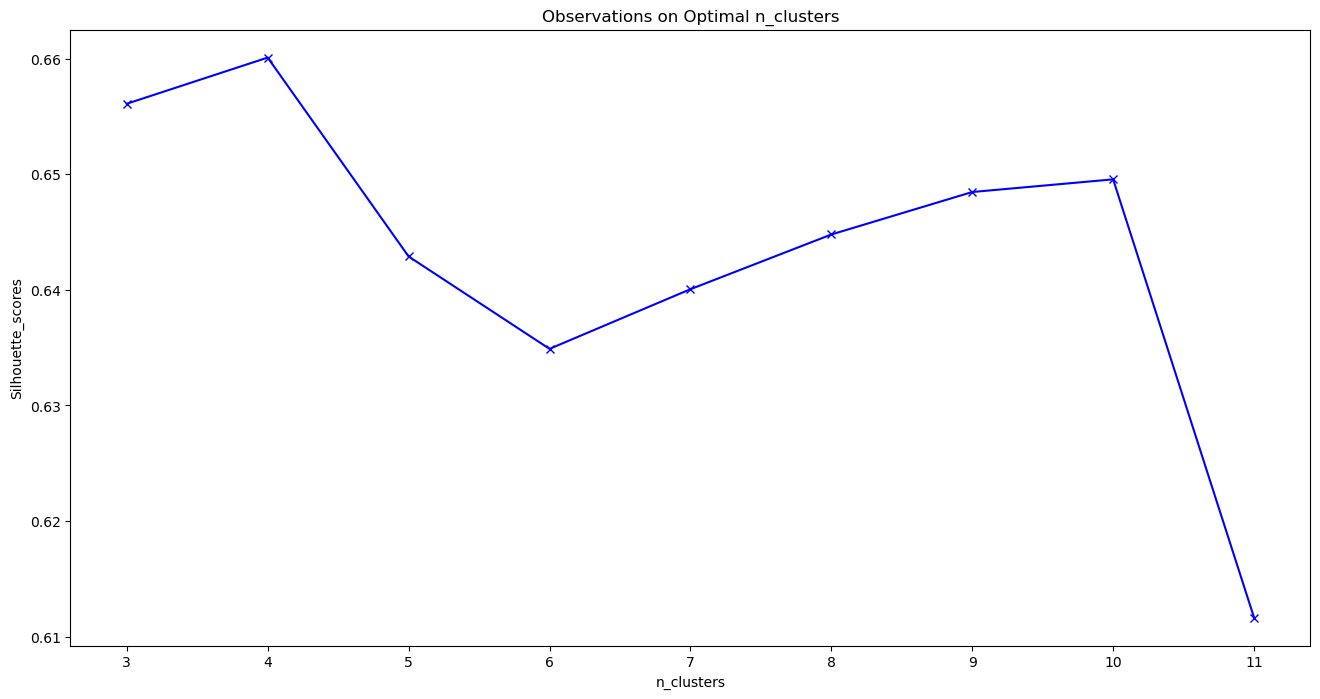

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

sil_scores = []
for n_clusters in range(3, 12):
    agg_cluster = AgglomerativeClustering(n_clusters = n_clusters)
    labels = agg_cluster.fit_predict(pca_final_features)
    silhouette_avg = silhouette_score(pca_final_features, labels)
    print(f'Silhouette_avg for {n_clusters}: {silhouette_avg}')
    
    sil_scores.append(silhouette_avg)

#Plot the elbow curve
plt.figure(figsize=(16,8))
plt.plot(range(3,12), sil_scores, 'bx-')
plt.xlabel('n_clusters')
plt.ylabel('Silhouette_scores')
plt.title('Observations on Optimal n_clusters')
plt.show()

From the graph above, we can see that the highest silhouette score values are for n = 3, 4, and 10. Since the clusters are later used in regression to recommend movies based on multiple features, having 3 or 4 clusters would not be very useful because it would not provide the specific and unique recommendations for movies that we are looking for. 

Thus, we select **optimal_n = 10** for our number of clusters.

The silhouette score measures how spread-apart clusters are. It ranges on a scale from -1 to +1, with higher scores closer to +1 indicating better-defined clusters. For n = 10, there is a **silhouette score of roughly 0.65**. Since silhouette score ranges from -1 to +1, with greater values indicating better clustering performance, our clusters did a pretty good job (and this is a considerable improvement from the K-Means Clustering silhouette score of 0.15)!

2) **Visualize Clusters**: Now that we have selected the optimal value of n, we can plot the clusters. 

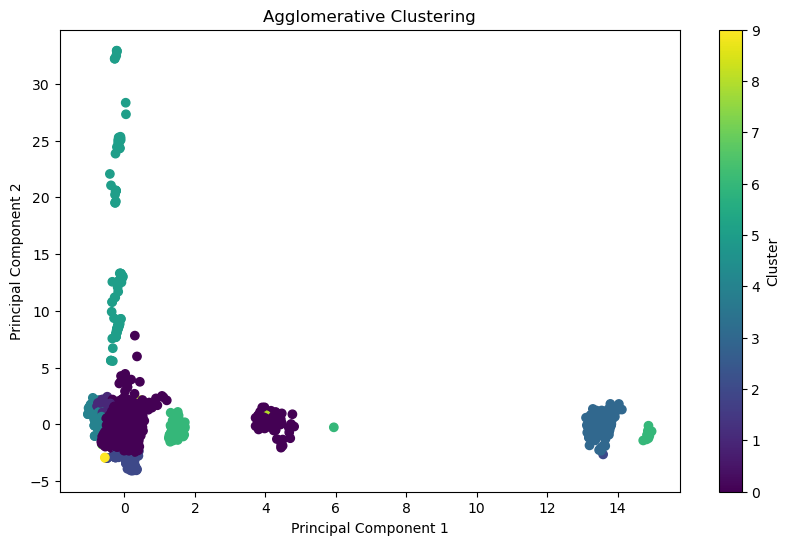

In [4]:
import matplotlib.pyplot as plt

# From graph above:
optimal_n = 10

# Perform agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters = optimal_n)
labels = agg_cluster.fit_predict(pca_final_features)

# Assign clusters to original dataframe
df_clustering['cluster'] = labels

plt.figure(figsize=(10,6))
plt.scatter(pca_final_features[:,0], pca_final_features[:,1], c=agg_cluster.labels_, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

From the graph, we can see that PCA has imrpoved the effectiveness of the K-Means Clustering algorithm.

### 4) Evaluation Metric: Pseudo Rand Index

Since the silhouette scores were calculated as a part of the agglomerative clustering process, we now evaluate the performance of the clustering algorithm through the pseudo rand index.

1) **Pseudo Rand Index**: We created a pseudo rand index that goes through the dataset, and for each movie listed, checks how many of the 5 TMDB-recommended movies are in the same cluster. 
    - Some of the movies that are recommended by TMDB may not be in our current dataset. Thus, rather than dividing the total number of same-cluster movies by 5, we divided it by the number of movies present in the database. 
    
The overall accuracy is below

In [5]:
df_clustering = df_clustering.drop_duplicates()
accuracy = []
for index, row in df_clustering.iterrows():
    try:
        #Get recommendation ID from current row
        current_cluster = row['cluster']
        same_cluster_count = 0
        recs_in_df = 1 #Avoid division by 0
    
        #Go through recommendation columns
        for i in range(1,6):
            #Get recommendation_{i} ID from current row
            rec_id = int(row[f'recommendation_{i}']) #rec_id is str
        
            #If recommended movie is in df 
            if rec_id in df_clustering['id'].values:
                recs_in_df += 1
               
                #Look up recommended movie's cluster
                rec_movie_cluster_row = df_clustering[df_clustering['id']==rec_id]['cluster']
                if rec_movie_cluster_row.empty == True:
                    same_cluster_count = 0
                else:
                    rec_movie_cluster = rec_movie_cluster_row.squeeze()
                    #print(rec_movie_cluster)
                    if rec_movie_cluster == current_cluster:
                        same_cluster_count += 1
    
        # Calculate the accuracy and append to the list
        accuracy.append((same_cluster_count/recs_in_df) * 100)
    except ValueError:
        accuracy.append(0)
        continue

# Add the counts as a new column in the DataFrame
df_clustering['clustering_accuracy_percent'] = accuracy
df_clustering['clustering_accuracy_percent']

#Calculate overall accuracy across clusters
avg_accuracy = sum(accuracy)/len(accuracy)
avg_accuracy

72.59259259258839

### 5) Logistic Regression Recommender

For the actual recommender system itself, we used logistic regression. The system was broken down into 2 functions:

1) **Calculate_euclidean_distance**: this function takes the id of a movie you want recommendations for, collects all other movies from the same cluster, calculates the euclidean distance between the input movie and all the other movies in the cluster, and returns a new dataframe with the appropriate information. It includes additional metrics that will be used in the regression itself, such as the popularity, vote_average, and vote_count of the movie. 

2) **Recommend_movies**: this function takes the output dataframe of calculate_euclidean_distance and performs logistic regression. The training parameters are euclidean distance, popularity, vote_average, and vote_count, and the target value to predict is the id of the first recommendation column. The top 5 recommended movie ids are returned. 

Finally, the id's of the recommended movies are matched with their titles for convenience. 

In [9]:
df_regression = df_clustering.copy()
def calculate_euclidean_distance(id, df_regression, clustering_column, feature_columns, df):

    # Get all members of the cluster from the clustering algorithm
    cluster_id = df_regression.loc[df_regression['id'] == id, clustering_column].values[0]
    cluster_data = df_regression[df_regression[clustering_column] == cluster_id]

    # Calculate euclidean distance
    id_features = df_regression.loc[df['id'] == id, feature_columns].values[0]
    cluster_features = cluster_data[feature_columns].values
    distances = np.linalg.norm(cluster_features - id_features, axis=1)

    # Create a new dataframe with it
    result_df = pd.DataFrame({
        'id': cluster_data['id'],
        'euclidean_distance': distances
    })
    result_df = pd.merge(result_df, df[['id', 'popularity', 'vote_average', 'vote_count']], on='id', how='left')

    return result_df

# This is how you put a movie in
id_to_find = 615656

# These are presets
cluster_column = 'cluster'
feature_columns = ['revenue', 'release_year', 'is_english', 'runtime', 'Frank Welker', 'Eric Roberts', 'Mark Calaway', 'Mel Blanc', 'Paul Michael Lévesque', 'Bess Flowers', 'Allen Jones', 'Nedumudi Venu', 'KPAC Lalitha', 'Jagathy Sreekumar', 'Warner Bros. Pictures', 'Paramount', 'Metro', 'Goldwyn', 'Mayer', 'Universal Pictures', 'Columbia Pictures', 'Toei Company', 'ARTE', 'ZDF', 'Film', 'ONF | NFB', 'BBC', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
result_df = calculate_euclidean_distance(id_to_find, df_regression, cluster_column, feature_columns, df)
print(result_df)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Input movie using TMDB ID
def recommend_movies(id, euc_dist_df, df_copy):
    #Make temporary df with the recommendation columns from the result of euc_dist_df
    #euc_dist_df is the result_df output from calculate_euclidean_distance
    recommendation_cols_df = pd.merge(euc_dist_df[['id']], df_copy[['id', 'recommendation_1', 
                                                                 'recommendation_2', 'recommendation_3', 
                                                                 'recommendation_4', 'recommendation_5']], on='id', how='inner')
    working_df = pd.merge(euc_dist_df, recommendation_cols_df, on="id", how="left")
        
    Regression to predict recommendations based on distance, etc.
    Split data into training + testing for regression
    x = working_df[['euclidean_distance', 'vote_count', 'vote_average', 'popularity']]
    y = working_df[['recommendation_1']].values
    y_df = pd.DataFrame(y, columns=['recommendation_1'])
    x.dropna()
    y_df = y_df.dropna().reset_index(drop=True)
    common_indices = x.index.intersection(y_df.index)

    # Select only the rows that are present in both x and y_df
    x_aligned = x.loc[common_indices]
    y_aligned = y_df.loc[common_indices]
    
    x_train, x_test, y_train, y_test = train_test_split(x_aligned, y_aligned, test_size=0.2, random_state=42)
        
    #Create and train the regression model
    regression_model = LogisticRegression()
    regression_model.fit(x_train, y_train)
        
    #Predict recommendations for test set
    y_pred = regression_model.predict(x_test)
        
    # Predict recommendation for all movies in the cluster
    all_recs = regression_model.predict(x)
        
    # Sort the movies based on predicted scores
    working_df['all_recs'] = all_recs
    
    return working_df['all_recs'].iloc[:5]
    
#Try it out:
result_df = result_df.dropna()
df_copy = df_copy.dropna()
rec_movies = recommend_movies(615656, result_df, df_copy) #615656 is "Meg 2: The Trench"
print(rec_movies)

           id  euclidean_distance  popularity  vote_average  vote_count
0      615656        0.000000e+00    8763.998         7.079      1365.0
1      758323        2.863807e+08    5953.227         7.433       545.0
2      667538        5.498898e+07    5409.104         7.340      1007.0
3      640146        1.237097e+08    4425.387         6.507      2811.0
4      385687        3.526532e+08    3583.861         7.275      3694.0
...       ...                 ...         ...           ...         ...
22335  551649        3.520565e+08       0.600         5.000         3.0
22336  520590        3.520565e+08       0.600         9.800         4.0
22337  529864        3.520565e+08       0.600         7.200         3.0
22338  545548        3.520565e+08       0.600         7.400         4.0
22339  520607        3.520565e+08       0.600         9.800         4.0

[22340 rows x 5 columns]
        id
0  1006462
1   205321
2   205321
3   205321
4   205321


After matching the id's back to the intial database, the titles of the recommended films for "Meg 2: The Trench" are:
- 1006462: "The Flood"
- 205321: "Sharknado"

This makes sense because "Meg 2: The Trench" and the recommended movies all have ocean/marine elements in their plot and involve hostile encounters with marine animals. 

# Discussion

### Interpreting the Result

#### Main Point: Clustering Result
The most important portion of this project is the clustering algorithm we chose. 

Initially when we were begining the project, we planned on doing K-Means clustering as a way of grouping the data. Our first attempt at K-Means was on the raw data without dimensionality reduction, and as indicated by the clustering plot in 2) Dimensionality Reduction, it did not turn out well. After applying PCA, we attempted K-Means again as documented in Kmeans_code.ipynb. Though the clusters made more sense visually, they did not provide meaningful insight into the data, as indicated by the low silhouette score and pseudo rand index accuracy. 

After changing to agglomerative clustering, the improvement in the evaluation metrics was noticeable. The silhouette score and pseudo rand index accuracy were significantly higher, and the recommendations made more sense. The change to agglomerative clustering may have caused an improvement due to the algorithm's flexibility with cluster shapes. K-means assumes clusters are spherical, but due to the varied nature of movie data, agglomerative clustering was able to better represent the data. 

#### Subpoint 1: Dimensionality Reduction Assessment

Introducing PCA into our system was a greatly important and necessary decision. By dimensionally reducing the data, we were able to form more distinguishable clusters and improve the performance of our algorithm. This can be seen by comparing the clustering results from the attempted K-Means implementation. Clearly, PCA helped separate the data points into clusters better, and this carried over to the agglomerative clustering algorithm as well

Before PCA: 
![bad_kmeans_cluster.png](bad_kmeans_cluster.png)

After PCA:
![kmeans_after_pca.png](kmeans_after_pca.png)

#### Subpoint 2: Silhouette Score Comparison

In our attempted K-Means implementation, the greatest silhouette score we got was **0.15**, which is less then satisfactory. However, after changing to agglomerative clustering, we have a silhouette score of roughly **0.65** which speaks to the improvement in cluster separation. This is reflected in the improved pseudo rand index accuracy as well. 

#### Subpoint 3: Pseudo Rand Index Accuracy Comparison

Again, when comparing the K-Means implementation to agglomerative clustering, the improvement becomes evident when looking at the pseudo rand index accuracy. For K-means, we got an accuracy of **47.2%** versus **73.6%** for agglomerative clustering

#### Subpoint 4: Recommendation Accuracy

Finally, the simplest check is to see whether or not the movies being recommended made sense or not. 

In the K-Means implementation, when we ran the recommendation function for a horror movie, we would receive results like Barbie movies, which does not make sense. However, in the current agglomerative clustering implementation, we would get movies in similar genres (such as Meg 2: The Trench and Sharknado both concerning marine terror). 

### Limitations

One of the major limitations we faced in our study was managing the "recommendations" column that had the IDs of movies that TMDB recommended. This became apparent when making the pseudo rand index, as some of the movies that were recommended were not in our dataset, either due to being dropped because of NaNs or duplicates, or because it was never there to begin with as the dataset does not encompass all the information in TMDB.

Additionally, due to the large number of credits and production companies, we were unable to utilize the full extent of the information provided because it simply would have been too many features. The credits (actors/directors, etc.) and production companies that were chosen were the most prominent in the dataset, but they are not necessarily indictive of their prominence in film in the modern era (for example, Mel Blanc was very famous for voicing cartoon characters in the 1900s, but not the name one would think of when recalling popular movie actors nowadays). Furthermore, the influence of these features were diminished due to our choice to inflate the one-hot encoded values of genre to give it more prominence. Essentially, the scope of our results are limited due to not including all the features the dataset offers.

There are also concerns about the algorithms for this project - namely in terms of the clustering. While we ended up settling on agglomerative clustering because the performance in terms of the silhouette score and accuracy for the recommendations from TMDB, this dataset is nowhere near as comprehensive as a full list may be, and so we would likely encounter problems in run-time as we scale this project up. Additionally, because we felt it was important to inflate the genre values, we needed to be careful of the algorithm not just making clusters based on genre. The regression was also somewhat limited in capabilities, because while we wanted to give recomendations in the cluster, our clusters were not perfect and so datapoints which were in the TMDB recommendations might not always be in the same cluster for the recomendation making the training process have less data to work with.

This project could definitely be expanded on in a number of ways, but one interesting idea is using the clusters for new predictions. While this current project uses metrics like revenue and reviews in order to make recommendations, the clusters are based on things that would be known before movies release (i.e. cast, genre, etc.), so this project could be expanded to give people suggestions on which new movies might be worth watching based on their preferences. This project would take a very similar approach through the clustering methods, and then would use the clusters and distance along with other potential predictors like budget to make suggestions on future movies without having the complete dataset on them.

### Ethics & Privacy

The movie data taken from TMDB is all publicly available information about the movies that have been subject to TMDB’s terms and conditions, and thus do not have any privacy infringements. Thus, in terms of the dataset, there is no highly sensitive information that is being handled and subsequently no visible ethical concern. However, ethical issues may arise in the form of biases, as the movie data may not include adequate amounts of foreign movies or films made by marginalized communities, and thus would not be completely representative of the industry as a whole since it only selects somewhat mainstream movies. This would limit the scope of our movie recommendation system to mostly movies released in the continental United States. We strive to make as unbiased a model as possible, and thus will be aware of these potential biases (as well as our own implicit biases) when conducting analysis into the data.

# Conclusion

Our project to create a movie recommendation system was somewhat successful. After trying and realizing the failure of a K-means clustering implementation, we turned to implementing agglomerative clustering on data that has been dimensionally reduced by PCA. We assessed the performance of our recommender through the silhouette score and a pseudo rand index and saw a significant improvement after changing to agglomerative clustering. Finally, we created a logistic regression recommender function that predicted the id of the first movie that TMDB recommends, which worked successfully. 

Though our recommender is far from perfect, we believe it to be a worthy attempt at understanding how more nuanced recommender systems that are in place on streaming platforms might operate. Future work should assess how performance can be improved by implementing different dimensionality reduction and clustering algorithms. Additionally, research can be done into other regression types that can fully utilize all the recommendations that TMDB provides for a given film. 

# Footnotes
<a name="taylornote"></a>1.[^](#taylor): Taylor, P. (16 Nov 2023) Volume of data/information created, captured, copied, and consumed worldwide from 2010 to 2020, with forecasts from 2021 to 2025. *Statista*. https://www.statista.com/statistics/871513/worldwide-data-created/<br> 
<a name="jayalakshminote"></a>2.[^](#jayalakshmi): Jayalakshmi, S., Ganesh, N., Čep, R. & Murugan, J. (29 Jun 2022) Movie Recommender Systems: concepts, Methods, Challenges, and Future Directions. *MDPI Open Access*. https://www.mdpi.com/1424-8220/22/13/4904<br> 